# Gradient-free `CRP` parameter optimization

In [1]:
import pennylane as qml
from pennylane import numpy as np
from numpy.typing import NDArray

from matplotlib import pyplot as plt

## 1. Set up demo circuit

In [2]:
from circuits import sim_03

num_layers = 5
num_qubits = 4
circuit = sim_03(num_layers, num_qubits)
initial_param = (
    np.random.random((num_layers, num_qubits, 2)),
    np.random.random((num_layers, num_qubits - 1))
)

print(qml.draw(circuit)(*initial_param))

0: ──RX(0.13)──RZ(0.74)─────────────────────╭RZ(0.28)──||──RX(0.92)──RZ(0.28)────────────────────
1: ──RX(0.71)──RZ(0.67)───────────╭RZ(0.46)─╰●─────────||──RX(0.11)──RZ(0.51)───────────╭RZ(0.26)
2: ──RX(0.71)──RZ(0.75)─╭RZ(0.33)─╰●───────────────────||──RX(0.58)──RZ(0.17)─╭RZ(0.03)─╰●───────
3: ──RX(0.19)──RZ(0.35)─╰●─────────────────────────────||──RX(0.53)──RZ(0.41)─╰●─────────────────

──╭RZ(0.05)──||──RX(0.77)──RZ(0.21)─────────────────────╭RZ(0.92)──||──RX(0.19)──RZ(0.35)──────────
──╰●─────────||──RX(0.96)──RZ(0.49)───────────╭RZ(0.70)─╰●─────────||──RX(0.55)──RZ(0.72)──────────
─────────────||──RX(0.56)──RZ(0.83)─╭RZ(0.28)─╰●───────────────────||──RX(0.75)──RZ(0.75)─╭RZ(0.13)
─────────────||──RX(0.27)──RZ(0.60)─╰●─────────────────────────────||──RX(0.40)──RZ(0.08)─╰●───────

────────────╭RZ(0.26)──||──RX(0.01)──RZ(0.09)─────────────────────╭RZ(0.63)──||─┤     
──╭RZ(0.02)─╰●─────────||──RX(0.29)──RZ(0.40)───────────╭RZ(0.67)─╰●─────────||─┤  <Z>
──╰●───────────────────||──RX(0.

## 2. Optimization loop

In [3]:
from CrotosolveOptimizer import CrotosolveOptimizer

def crotosolve(circuit, initial_rp_params, initial_crp_params, debug = False):
    optimizer = CrotosolveOptimizer()
    iterations_dataset = [circuit(initial_rp_params, initial_crp_params)]
    updates_dataset = [circuit(initial_rp_params, initial_crp_params)]

    params = (initial_rp_params.copy(), initial_crp_params.copy())
    for iteration in range(5):
        if debug: print(f" ===== ITERATION NO {iteration} =====")
        params, new_fun_value = optimizer.step_and_cost(circuit, *params, updates_dataset, debug=debug)
        iterations_dataset.append(new_fun_value)
    
    return params, iterations_dataset, updates_dataset

rng = np.random.default_rng()
params = initial_param

final_params, iterations_dataset, updates_dataset = crotosolve(circuit, *params, debug=True)

 ===== ITERATION NO 0 =====
Optimizing RP parameter (0, 0, 0)...
RP parameter update for (0, 0, 0) from 0.12666994081532046 to 11.261699436511748 -> y = 0.14120467567698872
Optimizing RP parameter (0, 0, 1)...
RP parameter update for (0, 0, 1) from 0.7370779686282403 to 6.073386417903761 -> y = 0.021183728436239613
Optimizing RP parameter (0, 1, 0)...
RP parameter update for (0, 1, 0) from 0.7130941429119902 to 5.376081005017994 -> y = -0.11946603788920357
Optimizing RP parameter (0, 1, 1)...
RP parameter update for (0, 1, 1) from 0.6663546001003652 to 8.399822721318639 -> y = -0.7280792555453953
Optimizing RP parameter (0, 2, 0)...
RP parameter update for (0, 2, 0) from 0.708488641341878 to 5.486213333397085 -> y = -0.8640337826964823
Optimizing RP parameter (0, 2, 1)...
RP parameter update for (0, 2, 1) from 0.7500435361744419 to 6.509219977749387 -> y = -0.8755652144757787
Optimizing RP parameter (0, 3, 0)...
RP parameter update for (0, 3, 0) from 0.1927059767808269 to 6.26383717497

## 3. Print charts

Text(0.5, 1.0, 'Loss curve over crotosolve iterations')

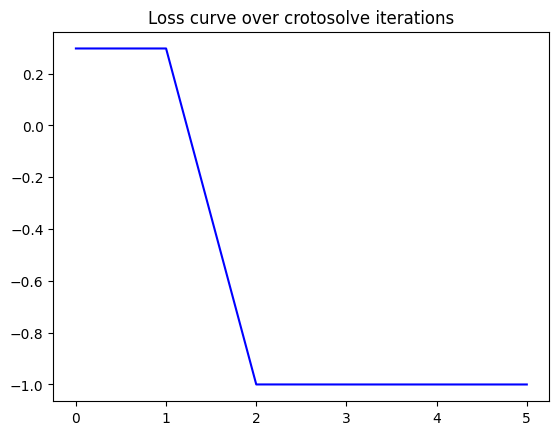

In [4]:

fig, ax = plt.subplots()
ax.plot(range(len(iterations_dataset)), iterations_dataset, 'b')
ax.set_title("Loss curve over crotosolve iterations")

Text(0.5, 1.0, 'Loss curve over circuit evaluations')

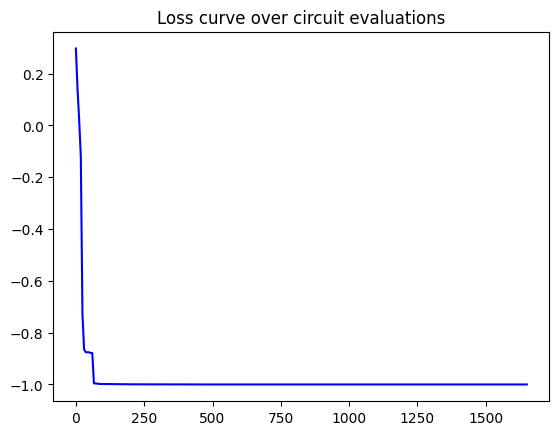

In [5]:

fig, ax = plt.subplots()
# multiply num of updates by 6 to get number of evaluations
ax.plot(6 * np.array(range(len(updates_dataset))), updates_dataset, 'b')
ax.set_title("Loss curve over circuit evaluations")